# Author : Pankaj Shivhare

## Task 1 : Prediction using Supervised Machine Learning

## GRIP @ The Sparks Foundation

In this perticular task, We are going to predict the percentage of marks of a student based upon the number of hours they studied with the help of Simple Linear Regression.


## Importing the Libraries

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importing the Dataset

In [2]:
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.shape

(25, 2)

## Data Preprocessing

### Checking for Null values

In [5]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

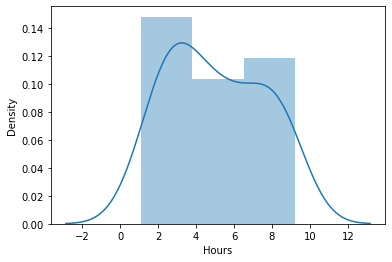

In [7]:
# Normal Distribution 
sns.distplot(data['Hours'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

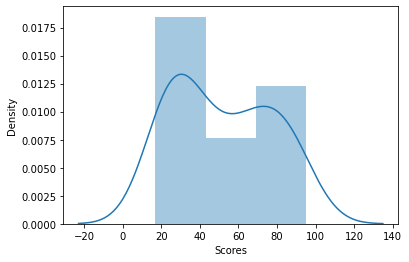

In [8]:
sns.distplot(data['Scores'])

Text(0, 0.5, 'Percentage')

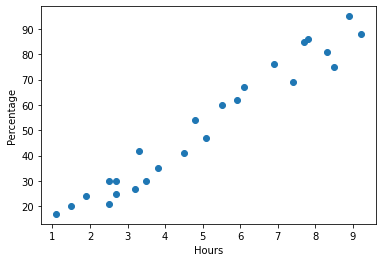

In [9]:
# Plotting the distribution of scores
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage')

From the above graph we can see that there is a linear relationship between the number of hours studied and percentage of score.

<AxesSubplot:>

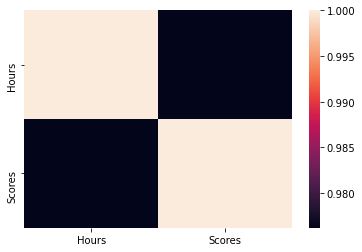

In [10]:
sns.heatmap(data.corr())

## Spliting the data in Train and Test

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Training the model

In [13]:
regressor = LinearRegression()  
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
# making prediction

y_pred = regressor.predict(x_test)

## Plotting the Line of regression

### On Training Data

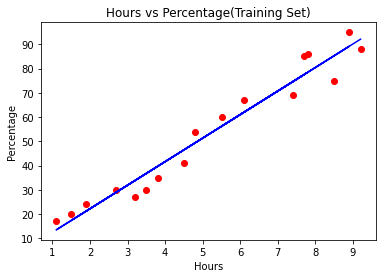

In [15]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Percentage(Training Set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

### On Testing Data

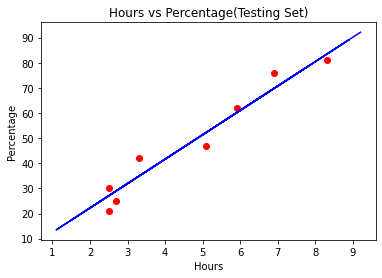

In [16]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Percentage(Testing Set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

## Comparing Actual And Predicted Values

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


## Evaluation of the Model

In [18]:
#Estimating training and test score
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.9536486503889446
Test Score: 0.9487647340257012


In [19]:
from sklearn import metrics 
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.499999999999998
Mean Squared Error: 23.61945761415174
Root Mean Squared Error: 4.859985351228103


## Predicting the Score for 9.25 Hours/day study.

In [20]:
regressor.predict([[9.25]])

array([92.61670034])